Datos cargados y limpiados correctamente.
Modelo Lasso entrenado correctamente.
Resultados Lasso Regression:
{'Model': 'Lasso Regression', 'MAE': 105.32341451589267, 'MSE': 18532.65214997133, 'RMSE': 136.13468386113558, 'R2': 0.9092291126803586}


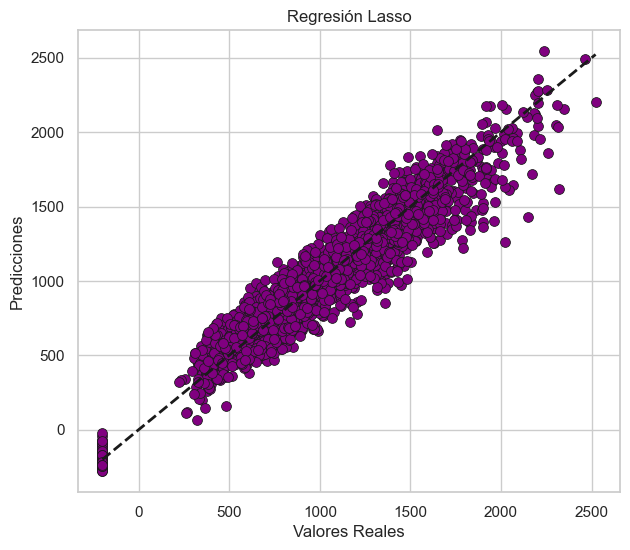

Gráfico Lasso mostrado correctamente.


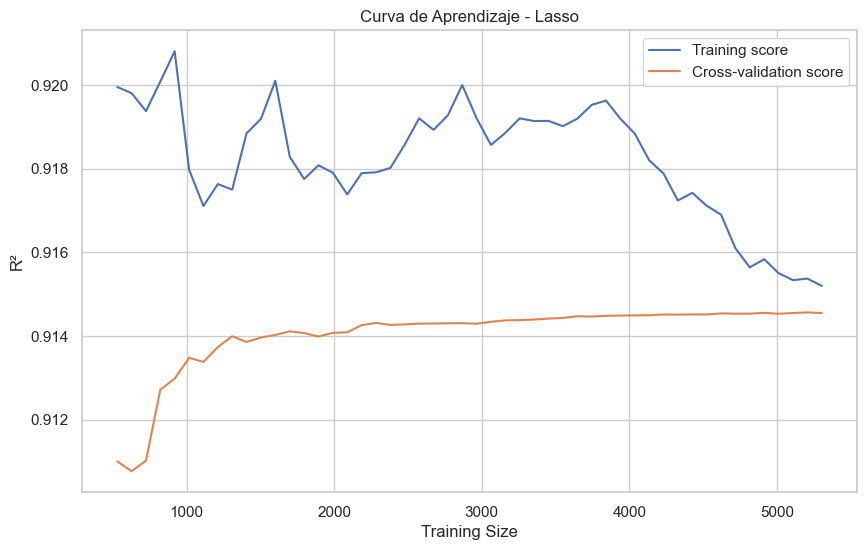

Curva de aprendizaje de Lasso mostrada correctamente.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

sns.set(style="whitegrid")

try:
    data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
    data = data.drop(columns=['Date', 'Time']).iloc[:, :-2]
    data = data.apply(pd.to_numeric, errors='coerce')
    data = data.fillna(data.mean())
    print("Datos cargados y limpiados correctamente.")
except Exception as e:
    print(f"Error al cargar o limpiar los datos: {e}")

X = data.drop(columns=['PT08.S5(O3)'])
y = data['PT08.S5(O3)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=100000, random_state=42)
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10]}
try:
    grid_lasso = GridSearchCV(lasso, param_grid_lasso, scoring='r2', cv=5, n_jobs=-1)
    grid_lasso.fit(X_train_scaled, y_train)
    best_lasso = grid_lasso.best_estimator_
    y_pred_lasso = best_lasso.predict(X_test_scaled)
    print("Modelo Lasso entrenado correctamente.")
except Exception as e:
    print(f"Error al entrenar el modelo Lasso: {e}")

try:
    lasso_results = {
        "Model": "Lasso Regression",
        "MAE": mean_absolute_error(y_test, y_pred_lasso),
        "MSE": mean_squared_error(y_test, y_pred_lasso),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        "R2": r2_score(y_test, y_pred_lasso),
    }
    print("Resultados Lasso Regression:")
    print(lasso_results)
except Exception as e:
    print(f"Error al calcular las métricas: {e}")

try:
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=y_test, y=y_pred_lasso, color="purple", edgecolor='k', s=50)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title('Regresión Lasso')
    plt.show()
    print("Gráfico Lasso mostrado correctamente.")
except Exception as e:
    print(f"Error al generar el gráfico: {e}")

try:
    def plot_learning_curve(model, title, X, y):
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, train_sizes=np.linspace(0.1, 1.0, 50), cv=5, scoring='r2'
        )
        train_mean = np.mean(train_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, label="Training score")
        plt.plot(train_sizes, test_mean, label="Cross-validation score")
        plt.title(title)
        plt.xlabel("Training Size")
        plt.ylabel("R²")
        plt.legend()
        plt.show()

    plot_learning_curve(best_lasso, "Curva de Aprendizaje - Lasso", X_train_scaled, y_train)
    print("Curva de aprendizaje de Lasso mostrada correctamente.")
except Exception as e:
    print(f"Error al generar la curva de aprendizaje: {e}")
